# Advanced Text Processing for CSV Data

## Overview
This notebook, created by Jesus Mendez, demonstrates advanced text processing techniques applied to CSV data. It includes functionality for reading text data, cleaning URLs, normalizing text, and using natural language processing tools to analyze and enrich text with linguistic features.

## Functionality
- **Data Reading:** Reads text data from CSV files.
- **Text Cleaning:** Includes removal of URLs and normalization of text.
- **Text Analysis:** Uses SpaCy for tokenization and extraction of linguistic features such as lemmas, parts of speech, and named entities.
- **CSV Manipulation:** Extends CSV files with additional columns that contain analyzed and processed data, enhancing the original dataset with valuable linguistic insights.

## Key Features
- **URL Removal:** Cleans text by removing any web URLs.
- **Text Normalization:** Converts text to a uniform format by stripping accents and special characters.
- **Linguistic Analysis:** Identifies and counts different parts of speech and named entities, categorizing words into verbs, nouns, adjectives, etc.
- **Output:** Writes the processed data back to new CSV files, incorporating additional columns that summarize the text's linguistic characteristics.

## Output
- The notebook outputs enhanced CSV files named `violencia_procesado.csv` and `noViolencia_procesado.csv`, each enriched with linguistic data.

## Author
- **Name:** Jesus Mendez

This notebook is ideal for data scientists and linguistic researchers looking to enrich textual data with linguistic features for more in-depth analysis or machine learning applications.


### Importing Necessary Libraries
This section imports essential libraries and modules needed for the data manipulation, text processing, and visualization tasks in this notebook. It includes libraries such as `csv` for reading and writing CSV files, `re` for regular expressions, `spacy` for advanced natural language processing, `numpy` for numerical operations, and `matplotlib.pyplot` for plotting graphs.


In [1]:
import csv
import re
import spacy 
import unicodedata
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import Levenshtein


### Text Extraction and URL Removal
Defines functions to extract text data from a CSV file and remove URLs from the text using regular expressions. The text is also converted to lowercase to standardize it for further processing.


In [2]:
def saveText(input_path):
    with open(input_path, 'r', encoding="utf-8") as input_file:
        reader = csv.reader(input_file)
        text = [row[1] for row in reader]  # Lee la primera columna del archivo de entrada

    return text

def eliminar_url(textos):
    # Creamos una expresión regular para identificar las URLs en el texto
    url_pattern = re.compile(r'https?://\S+')

    # Iteramos sobre cada texto de la lista y eliminamos las URLs
    textos_sin_url = []
    for texto in textos:
        # Utilizamos el método sub de la expresión regular para reemplazar la URL por una cadena vacía
        texto_sin_url = url_pattern.sub('', texto)
        textos_sin_url.append(texto_sin_url.lower())

    return textos_sin_url



### Text Processing Using SpaCy
Provides a detailed function to process text using SpaCy. This includes tokenizing the text, removing stopwords, and normalizing tokens (lemmatization and removing special characters). The function also concatenates processed tokens into a clean text string.


In [15]:
def process(cadena, nlp):
    # Tokeniza el texto usando SpaCy
    doc = nlp(cadena)

    # Define los tipos de palabras que deseas eliminar (stopWords)
    stopWords = ["SCONJ", "CCONJ", "ADP", "DET", "PRON"]

    # Lista para almacenar los lemas
    lemmas = []

    # Recorre los tokens en el documento
    for token in doc:
        # Verifica si el token no está en la lista de stopWords y no es un signo de puntuación
        if token.pos_ not in stopWords and not token.is_punct:
            # Utiliza el atributo lemma_ para obtener el verbo en su forma base (infinitivo)
            lemma = token.lemma_
            # Normaliza el token para eliminar acentos y caracteres especiales
            normalized_token = unicodedata.normalize('NFKD', lemma).encode('ASCII', 'ignore').decode('utf-8')
            lemmas.append(normalized_token)

    # Une los lemas en una cadena de texto
    return ' '.join(lemmas)

def procesarCorpus(corpus,nlp):

    corpusProcesado = list()

    for noticia in corpus:
        corpusProcesado.append(process(noticia, nlp))
    
    return corpusProcesado




### Word Frequency Analysis
Contains code to categorize and count different types of words (such as adjectives, verbs, and nouns) and named entities from processed text. This analysis is performed using natural language processing techniques, and results are visualized using a word cloud and other plotting methods.


In [16]:
def separarCorpus(text, labels):
    
    nlp = spacy.load('es_core_news_sm')

    texto = saveText(text)
    texto = eliminar_url(texto)
    corpusProcesado = procesarCorpus(texto,nlp)

    etiquetas = list()
    
    with open(labels, 'r', newline='') as archivo:
        lector_csv = csv.reader(archivo)
        for fila in lector_csv:
            
            etiquetas.append(fila[0])

    violento = list()
    noViolento = list()

    for i in zip(etiquetas, corpusProcesado):
       
        if int(i[0]) == 0:
            noViolento.append(i[1])
        elif int(i[0]) == 1:
            violento.append(i[1])
    
    return violento, noViolento

### Data Enrichment and CSV Manipulation
This part of the notebook enhances a CSV file by adding new columns that quantify the number of different word categories (adjectives, verbs, nouns, named entities) extracted from the text. The processed data is saved into a new CSV file, facilitating further analysis or reporting.


In [18]:
violento, noViolento = separarCorpus("train_data.csv", "labelsBin.csv")
# Nombre del archivo CSV
archivo_csv = "violencia.csv"

# Función para escribir los datos en un archivo CSV
def guardar_corpus_en_csv(violento, nombre_archivo):
    with open(nombre_archivo, 'w', newline='') as archivo:
        escritor_csv = csv.writer(archivo)
        for texto in violento:
            escritor_csv.writerow([texto])

# Guardar los datos en el archivo CSV
guardar_corpus_en_csv(violento, archivo_csv)

archivo_csv = "noViolencia.csv"


# Función para escribir los datos en un archivo CSV
def guardar_corpus_en_csv(noViolento, nombre_archivo):
    with open(nombre_archivo, 'w', newline='') as archivo:
        escritor_csv = csv.writer(archivo)
        for texto in noViolento:
            escritor_csv.writerow([texto])

# Guardar los datos en el archivo CSV
guardar_corpus_en_csv(noViolento, archivo_csv)

### Processing Specific Files
Describes the steps taken to process specific files containing textual data, categorizing words and enriching the original dataset with additional linguistic features. This process aims to prepare the data for further analytical tasks or machine learning models.


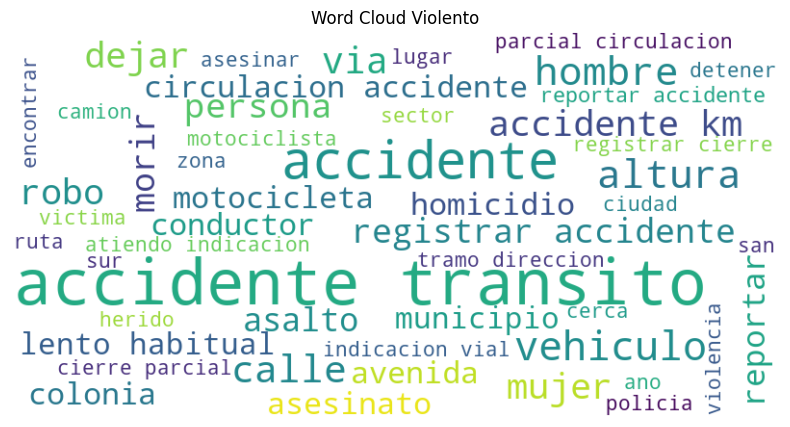

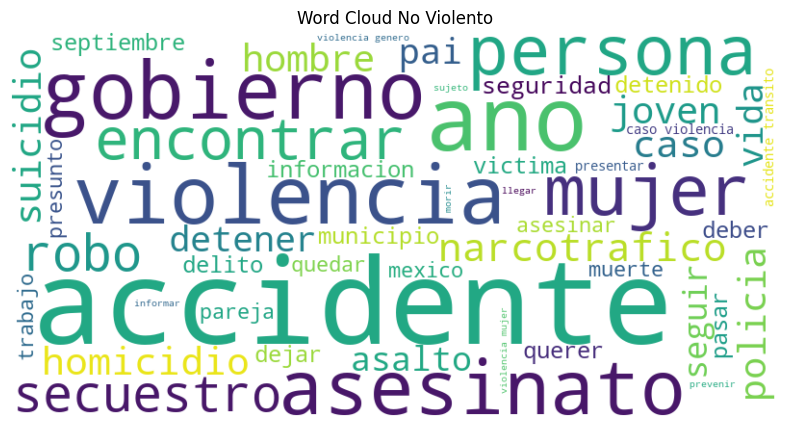

In [19]:
    
nlp = spacy.load("es_core_news_sm")

# Función para procesar los Tweets y obtener palabras
def procesar_tweets(textos):
    palabras = []
    for texto in textos:
        doc = nlp(texto)
        for token in doc:
            if token.is_alpha and not token.is_stop:
                palabras.append(token.text.lower())
    return palabras

# Procesar los Tweets violentos y no violentos
palabras_violentas = procesar_tweets(violento)
palabras_no_violentas = procesar_tweets(noViolento)
# Función para generar y mostrar la word cloud
def generar_wordcloud(palabras, titulo):
    texto = " ".join(palabras)
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.show()

# Generar word clouds y mostrar las palabras más frecuentes
generar_wordcloud(palabras_violentas, "Word Cloud Violento")
generar_wordcloud(palabras_no_violentas, "Word Cloud No Violento")

In [20]:
# Función para procesar los Tweets y contar palabras por categoría y variable sintáctica
def contar_palabras_por_categoria(textos):
    adjetivos = []
    verbos = []
    sustantivos = []
    ner = []

    for texto in textos:
        doc = nlp(texto)
        for token in doc:
            if token.is_alpha and not token.is_stop:
                if token.pos_ == "ADJ":
                    adjetivos.append(token.text.lower())
                elif token.pos_ == "VERB":
                    verbos.append(token.text.lower())
                elif token.pos_ == "NOUN":
                    sustantivos.append(token.text.lower())

        for ent in doc.ents:
            ner.append(ent.text.lower())

    return {
        "Adjetivos": adjetivos,
        "Verbos": verbos,
        "Sustantivos": sustantivos,
        "NER": ner
    }

# Procesar los Tweets violentos y no violentos
resultados_violencia = contar_palabras_por_categoria(violento)
resultados_no_violencia = contar_palabras_por_categoria(noViolento)

# Función para obtener las palabras más frecuentes y mostrarlas
def palabras_mas_frecuentes(palabras, categoria):
    frecuencia = Counter(palabras)
    palabras_frecuentes = frecuencia.most_common(10)  # Cambia el número si deseas más palabras
    print(f"{categoria} {palabras_frecuentes}")

# Mostrar las palabras más frecuentes por categoría y variable sintáctica
for categoria, palabras in resultados_violencia.items():
    palabras_mas_frecuentes(palabras, f"{categoria} violencia")

for categoria, palabras in resultados_no_violencia.items():
    palabras_mas_frecuentes(palabras, f"{categoria} noViolencia")


Adjetivos violencia [('transito', 264), ('trafico', 133), ('lesionado', 103), ('herido', 100), ('vial', 99), ('vehiculo', 71), ('accidente', 69), ('muerto', 67), ('habitual', 59), ('lento', 56)]
Verbos violencia [('registrar', 153), ('reportar', 118), ('dejar', 104), ('atender', 76), ('detener', 63), ('morir', 63), ('resultar', 57), ('perder', 55), ('trasladar', 52), ('atiendo', 49)]
Sustantivos violencia [('accidente', 902), ('persona', 167), ('hombre', 98), ('policia', 92), ('carril', 78), ('altura', 73), ('mujer', 71), ('ano', 70), ('asalto', 54), ('violencia', 53)]
NER violencia [('traficosv', 21), ('veracruz', 15), ('atencion', 14), ('reportevial', 11), ('oaxaca', 8), ('ahora', 7), ('cuautla', 7), ('zacatecas', 6), ('avanzando20', 6), ('xalapa', 6)]
Adjetivos noViolencia [('narcotrafico', 109), ('victima', 73), ('presunto', 71), ('nacional', 68), ('joven', 67), ('suicidio', 53), ('accidente', 48), ('nino', 44), ('publico', 43), ('sexual', 41)]
Verbos noViolencia [('encontrar', 98)

In [34]:
# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para calcular la cantidad de palabras coincidentes con similitud Levenshtein mayor a 0.85
def palabras_coincidentes(palabras1, palabras2):
    coincidentes = []
    for palabra1 in palabras1:
        for palabra2 in palabras2:
            distancia = Levenshtein.distance(palabra1, palabra2)
            longitud_max = max(len(palabra1), len(palabra2))
            similitud = 1.0 - (distancia / longitud_max)
            if similitud > 0.85:
                coincidentes.append(palabra1)
    return coincidentes

# Función para procesar los Tweets y contar palabras por categoría y variable sintáctica
def contar_palabras_por_categoria(textos):
    adjetivos = []
    verbos = []
    sustantivos = []
    ner = []

    for texto in textos:
        doc = nlp(texto)
        for token in doc:
            if token.is_alpha and not token.is_stop:
                if token.pos_ == "ADJ":
                    adjetivos.append(token.text.lower())
                elif token.pos_ == "VERB":
                    verbos.append(token.text.lower())
                elif token.pos_ == "NOUN":
                    sustantivos.append(token.text.lower())

        for ent in doc.ents:
            ner.append(ent.text.lower())

    return {
        "Adjetivos": adjetivos,
        "Verbos": verbos,
        "Sustantivos": sustantivos,
        "NER": ner
    }

In [35]:
# Nombre del archivo CSV
archivo_csv = "violencia.csv"

# Procesar los Tweets violentos y agregar columnas al archivo CSV
with open(archivo_csv, 'r', newline='') as archivo_lectura, open("violencia_procesado.csv", 'w', newline='') as archivo_escritura:
    lector_csv = csv.reader(archivo_lectura)
    escritor_csv = csv.writer(archivo_escritura)
    encabezados = next(lector_csv)  # Leer los encabezados
    encabezados.extend(["Adjetivos", "Verbos", "Sustantivos", "NER"])
    escritor_csv.writerow(encabezados)  # Escribir los encabezados

    for fila in lector_csv:
        texto = fila[0]  # Obtener el texto del CSV
        resultados = contar_palabras_por_categoria([texto])
        #print(len(resultados["Adjetivos"]))
        fila.extend([" "+str(len(resultados["Adjetivos"])), " "+str(len(resultados["Verbos"])),
                     " "+str(len(resultados["Sustantivos"])), " "+str(len(resultados["NER"]))])
        escritor_csv.writerow(fila)  # Escribir la fila procesada

print("Se ha procesado el archivo y se ha guardado como 'violencia_procesado.csv'")

Se ha procesado el archivo y se ha guardado como 'violencia_procesado.csv'


In [37]:
# Nombre del archivo CSV
archivo_csv = "noViolencia.csv"

# Procesar los Tweets violentos y agregar columnas al archivo CSV
with open(archivo_csv, 'r', newline='') as archivo_lectura, open("noViolencia_procesado.csv", 'w', newline='') as archivo_escritura:
    lector_csv = csv.reader(archivo_lectura)
    escritor_csv = csv.writer(archivo_escritura)
    encabezados = next(lector_csv)  # Leer los encabezados
    encabezados.extend(["Adjetivos", "Verbos", "Sustantivos", "NER"])
    escritor_csv.writerow(encabezados)  # Escribir los encabezados

    for fila in lector_csv:
        texto = fila[0]  # Obtener el texto del CSV
        resultados = contar_palabras_por_categoria([texto])
        #print(len(resultados["Adjetivos"]))
        fila.extend([" "+str(len(resultados["Adjetivos"])), " "+str(len(resultados["Verbos"])),
                     " "+str(len(resultados["Sustantivos"])), " "+str(len(resultados["NER"]))])
        escritor_csv.writerow(fila)  # Escribir la fila procesada

print("Se ha procesado el archivo y se ha guardado como 'noViolencia_procesado.csv'")

Se ha procesado el archivo y se ha guardado como 'noViolencia_procesado.csv'
